In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot,plot,init_notebook_mode, download_plotlyjs
%matplotlib inline
import cufflinks as cf

#download_plotlyjs()
init_notebook_mode(connected = True)
cf.go_offline()
mydata = pd.read_csv("Cloud02_10June.txt",sep="|")
print(mydata)

          date                 vcName                   service    pid  \
0   1560127788  cloud02-w3.stls.local           content-library  44560   
1   1560128781  cloud02-w3.stls.local             vapi-endpoint  36588   
2   1560129803  cloud02-w3.stls.local                 analytics  35188   
3   1560146880  cloud02-w3.stls.local                    system      0   
4   1560146982  cloud02-w3.stls.local                    vmdird   3449   
5   1560146985  cloud02-w3.stls.local                     vmcad   3636   
6   1560146980  cloud02-w3.stls.local                    vmafdd   3296   
7   1560146986  cloud02-w3.stls.local                 analytics   3689   
8   1560146988  cloud02-w3.stls.local                  applmgmt   3836   
9   1560147038  cloud02-w3.stls.local     certificatemanagement   9438   
10  1560146987  cloud02-w3.stls.local               cis-license   3818   
11  1560146989  cloud02-w3.stls.local                       eam   3933   
12  1560146987  cloud02-w3.stls.local 

In [2]:
from datetime import datetime as dt
import numpy as np
df_sortedByTimestamp = mydata[["service","boot_time_in_sec","last_started_at","last_triggered_at"]]
df_sortedByTimestamp["date"] = df_sortedByTimestamp["last_started_at"].apply(lambda x : dt.strptime(str(x).split(".")[0],"%Y-%m-%d %H:%M:%S").timestamp())
myrebootdate = df_sortedByTimestamp[df_sortedByTimestamp['service'] == 'system']['date'].iloc[0]
df_sortedByTimestamp=df_sortedByTimestamp[df_sortedByTimestamp['date']>myrebootdate]

df_sortedByTimestamp["finish"] = df_sortedByTimestamp["last_started_at"].apply(lambda x : dt.strptime(str(x),"%Y-%m-%d %H:%M:%S.%f").timestamp())
df_sortedByTimestamp["start"] = df_sortedByTimestamp["last_triggered_at"].apply(lambda x : dt.strptime(str(x),"%Y-%m-%d %H:%M:%S.%f").timestamp())

mymin = np.min(df_sortedByTimestamp["start"].min())
mymax = np.max(df_sortedByTimestamp["finish"].max())

df_sortedByTimestamp["finish"] = df_sortedByTimestamp["finish"].apply(lambda x: (x-mymin))
df_sortedByTimestamp["start"] = df_sortedByTimestamp["start"].apply(lambda x: (x-mymin))
df_sortedByTimestamp['service'] = df_sortedByTimestamp['service'].apply(lambda x : x.replace('vmware-',''))
df_sortedByTimestamp = df_sortedByTimestamp.sort_values(by="date",ascending = True)
#df_sortedByTimestamp["service_pid"] = df_sortedByTimestamp["service"]+ "\n"+df_sortedByTimestamp["boot_time_in_sec"].astype(str).apply(lambda x : x.split(".")[0] ) + " sec"
#df_sortedByTimestamp["time"] = df_sortedByTimestamp["date"].apply(lambda x: str(dt.fromtimestamp(x)))
df_sortedByTimestamp2 = df_sortedByTimestamp.copy()
df_sortedByTimestamp = df_sortedByTimestamp.iloc[6:]
print(df_sortedByTimestamp.head())
print(df_sortedByTimestamp.tail())


              service  boot_time_in_sec             last_started_at  \
12              envoy          1.335559  2019-06-10 06:09:48.719000   
25  postgres-archiver          1.486648  2019-06-10 06:09:49.123000   
15         rhttpproxy          2.748646  2019-06-10 06:09:50.338000   
8            applmgmt         13.665166  2019-06-10 06:10:01.844000   
10        cis-license         29.330477  2019-06-10 06:10:17.067000   

             last_triggered_at          date      finish      start  
12  2019-06-10 06:09:47.383441  1.560127e+09   95.523735  94.188176  
25  2019-06-10 06:09:47.636352  1.560127e+09   95.927735  94.441087  
15  2019-06-10 06:09:47.589354  1.560127e+09   97.142735  94.394089  
8   2019-06-10 06:09:48.178834  1.560127e+09  108.648735  94.983569  
10  2019-06-10 06:09:47.736523  1.560127e+09  123.871735  94.541258  
            service  boot_time_in_sec             last_started_at  \
31       perfcharts         31.394758  2019-06-10 06:13:48.809000   
37         vsan

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text yticklabel objects>)

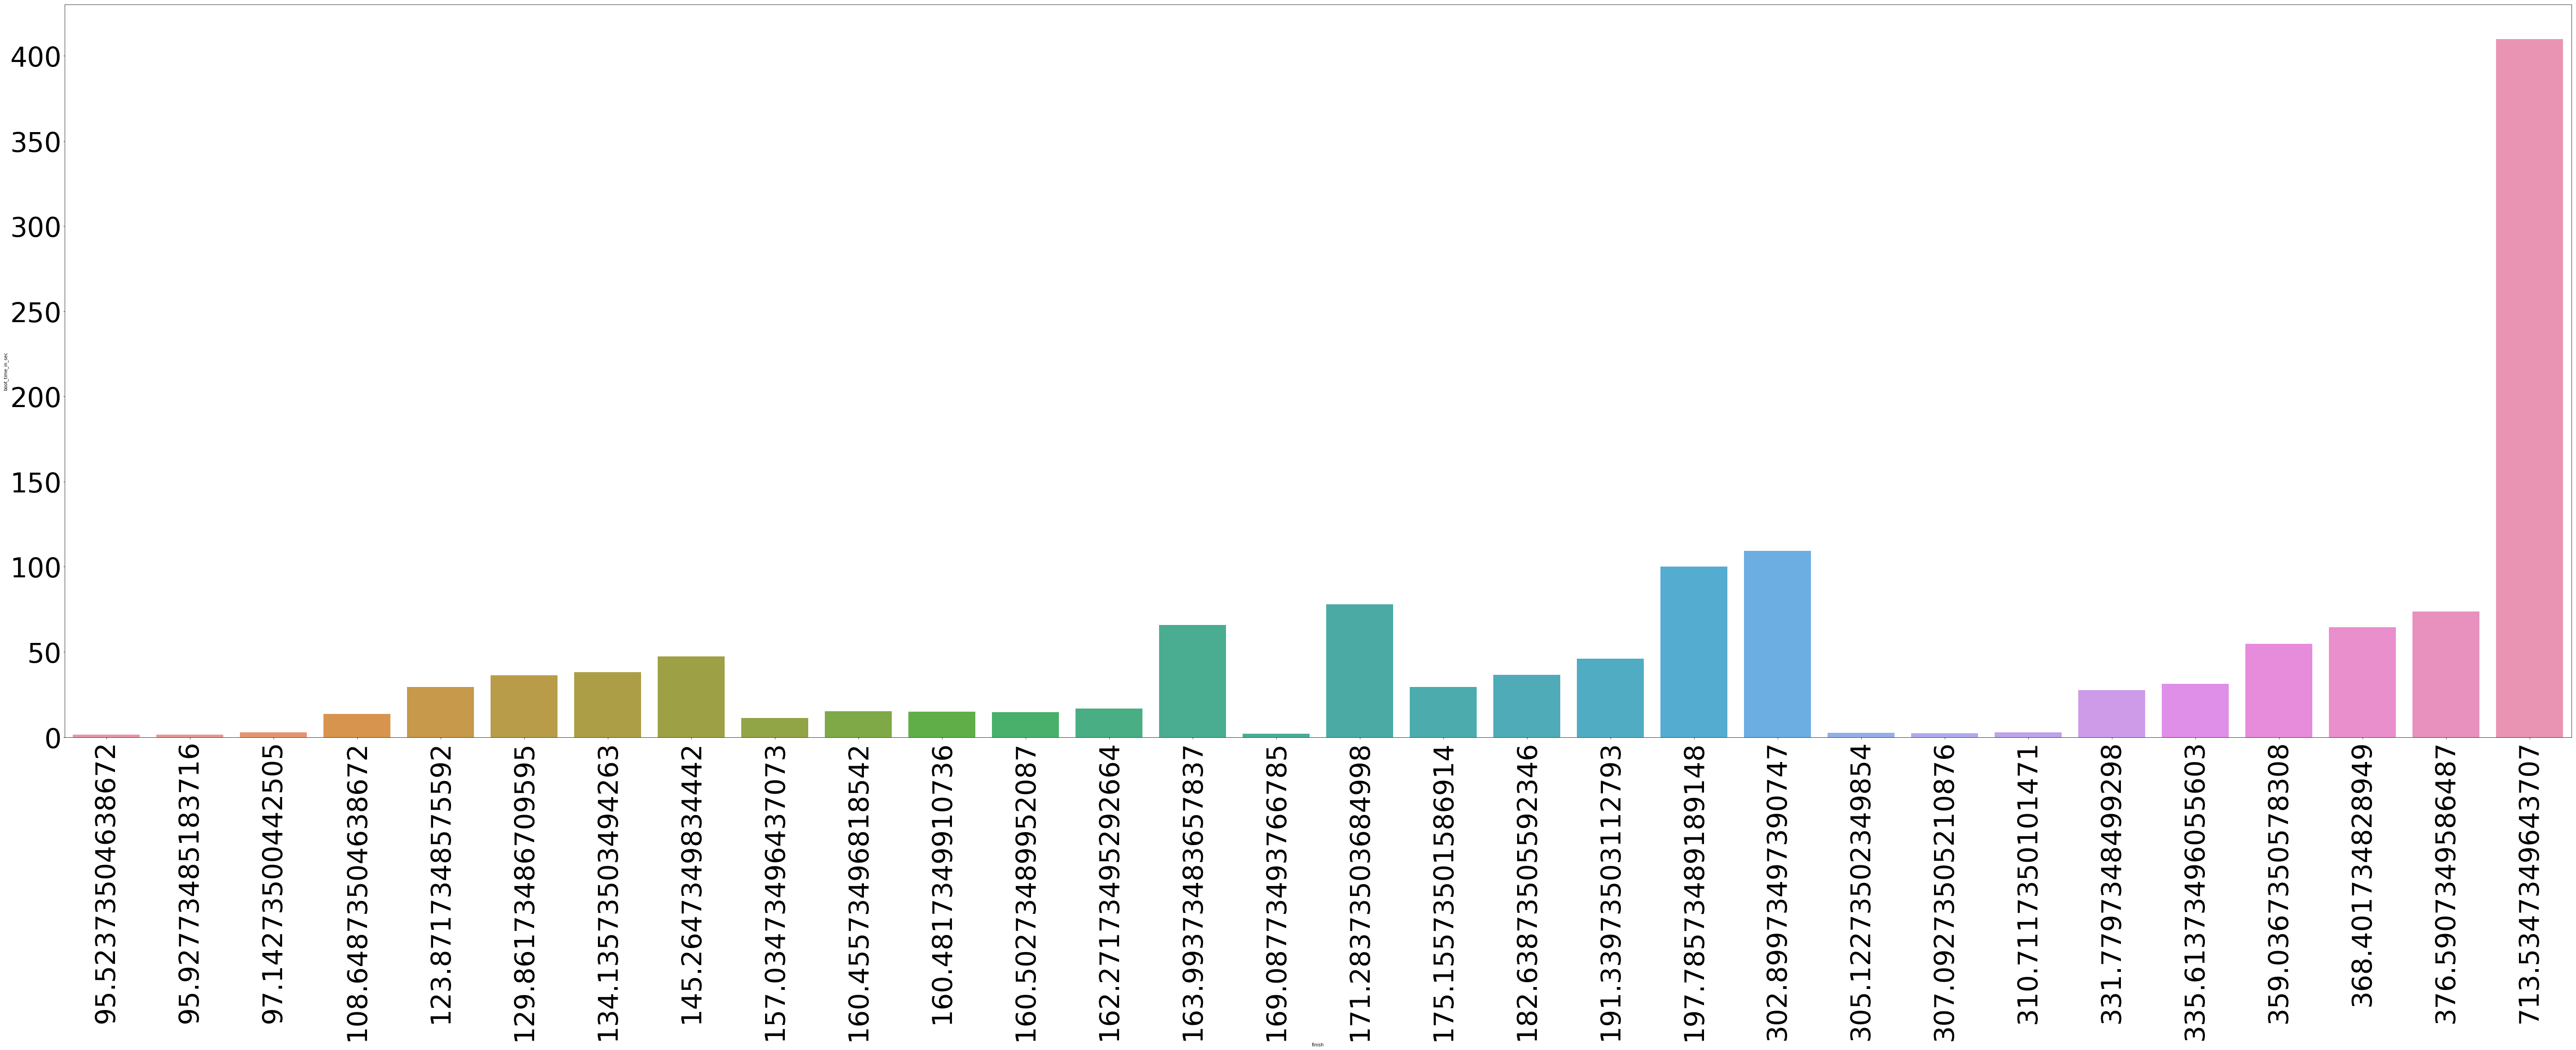

In [3]:
plt.figure(figsize=(100,30))
sns.barplot(data = df_sortedByTimestamp, x =  'finish', y = 'boot_time_in_sec')
plt.xticks(rotation=90,fontsize=60)
plt.yticks(fontsize=60)

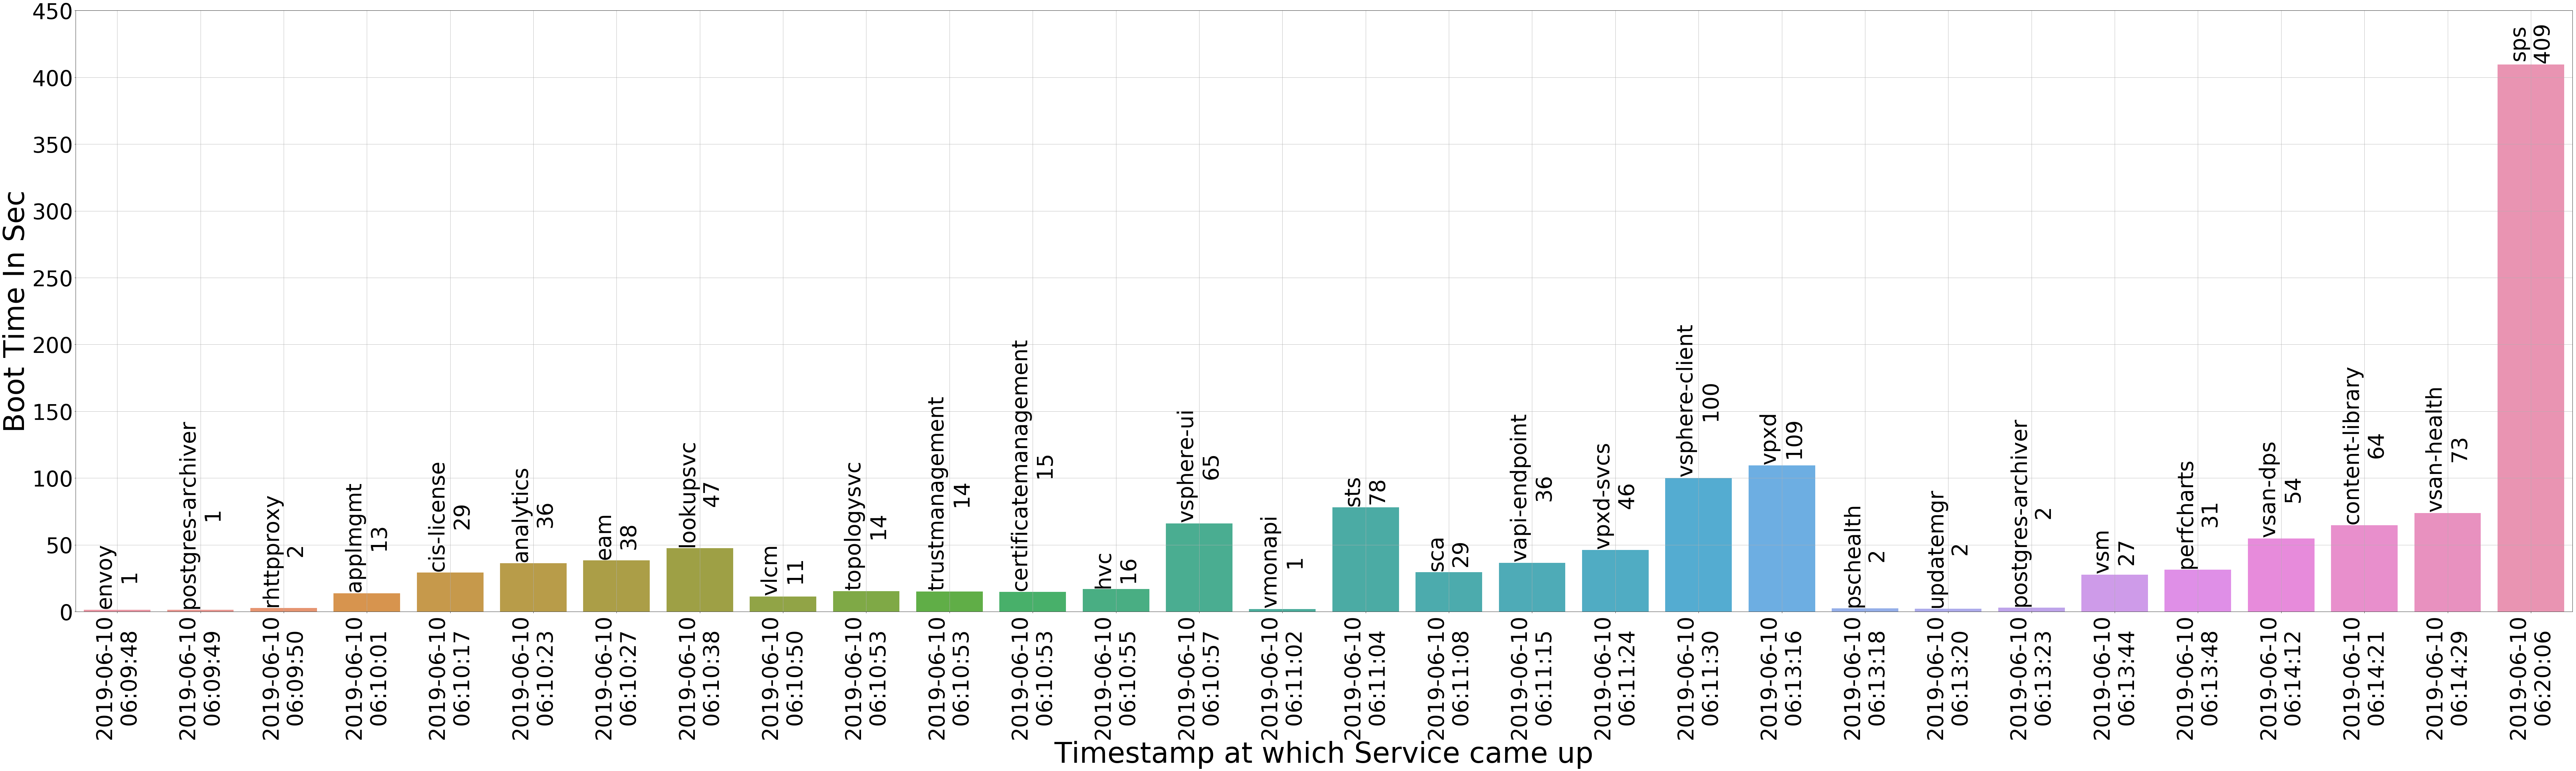

In [4]:
plt.figure(figsize=(100,30))
g = sns.barplot(data = df_sortedByTimestamp, x =  'finish', y = 'boot_time_in_sec')
#g.text('1559783904','72.7128',"Bla",color='black',ha='center')
plt.grid(True)
plt.xticks(rotation=90,fontsize=60)
plt.yticks(fontsize=60)
plt.xlabel("Timestamp at which Service came up",fontsize=80)
plt.ylabel("Boot Time In Sec",fontsize=80)
plt.ylim(0,450)
g.set_xticklabels(df_sortedByTimestamp["last_started_at"].astype(str).apply(lambda x: x.split(".")[0].replace(" ","\n")))

rects = g.patches

# Make some labels.
labels = df_sortedByTimestamp["service"]+"\n"+df_sortedByTimestamp['boot_time_in_sec'].apply(lambda x : str(x).split('.')[0])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    g.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom',fontsize=60,rotation=90)
    
plt.tight_layout()
    
plt.savefig('myplot.png',dpi=300)
plt.show()




In [5]:
df_sortedByTimestamp.iloc[1,:]
#

service                       postgres-archiver
boot_time_in_sec                        1.48665
last_started_at      2019-06-10 06:09:49.123000
last_triggered_at    2019-06-10 06:09:47.636352
date                                1.56013e+09
finish                                  95.9277
start                                   94.4411
Name: 25, dtype: object

In [6]:
df_sortedByTimestamp

,service,boot_time_in_sec,last_started_at,last_triggered_at,date,finish,start
12,envoy,1.335559,2019-06-10 06:09:48.719000,2019-06-10 06:09:47.383441,1.560127e+09,95.523735,94.188176
25,postgres-archiver,1.486648,2019-06-10 06:09:49.123000,2019-06-10 06:09:47.636352,1.560127e+09,95.927735,94.441087
15,rhttpproxy,2.748646,2019-06-10 06:09:50.338000,2019-06-10 06:09:47.589354,1.560127e+09,97.142735,94.394089
8,applmgmt,13.665166,2019-06-10 06:10:01.844000,2019-06-10 06:09:48.178834,1.560127e+09,108.648735,94.983569
10,cis-license,29.330477,2019-06-10 06:10:17.067000,2019-06-10 06:09:47.736523,1.560127e+09,123.871735,94.541258
7,analytics,36.158827,2019-06-10 06:10:23.057000,2019-06-10 06:09:46.898173,1.560127e+09,129.861735,93.702908
11,eam,38.242752,2019-06-10 06:10:27.331000,2019-06-10 06:09:49.088248,1.560127e+09,134.135735,95.892983
14,lookupsvc,47.445493,2019-06-10 06:10:38.460000,2019-06-10 06:09:51.014507,1.560127e+09,145.264735,97.819242
23,vlcm,11.240702,2019-06-10 06:10:50.230000,2019-06-10 06:10:38.989298,1.560127e+09,157.034735,145.794033
19,topologysvc,14.928775,2019-06-10 06:10:53.677000,2019-06-10 06:10:38.748225,1.560127e+09,160.481735,145.552960


In [141]:
#df_vpxd = pd.read_csv("cloud02_vpxd_6June.txt",sep=",")
df_vpxd = pd.read_csv("cloud02_vpxd_10June.csv",sep=",")
df_vpxd

,time,stcomp_vpxd_timestamp,source,hostname,stcomp_vpxd_subcomp_name,Max of stcomp_vpxd_comp_api_time (ST Charts),Sum of stcomp_vpxd_comp_api_time (ST Charts)
0,2019-06-10T06:12:00.000Z,2019-06-10t06:12:34,10.146.13.19,cloud02-w3.stls.local,serverapp::init [totaltime],61581,123162
1,2019-06-10T06:12:00.000Z,2019-06-10t06:12:07,10.146.13.19,cloud02-w3.stls.local,[vpxdinvtvm::init(dasprotmap)],5589,11178
2,2019-06-10T06:12:00.000Z,2019-06-10t06:12:01,10.146.13.19,cloud02-w3.stls.local,[vpxdinvthost::init()],3931,7862
3,2019-06-10T06:12:00.000Z,2019-06-10t06:12:12,10.146.13.19,cloud02-w3.stls.local,[alarmmomanager::init()],1725,3450
4,2019-06-10T06:12:00.000Z,2019-06-10t06:12:21,10.146.13.19,cloud02-w3.stls.local,[vpxddatastore::init2()],1340,2680
5,2019-06-10T06:11:00.000Z,2019-06-10t06:11:36,10.146.13.19,cloud02-w3.stls.local,[localizationmanagermo::init()],3261,6522


In [142]:
from datetime import datetime as dt
df_vpxd['date'] = df_vpxd["stcomp_vpxd_timestamp"].apply(lambda x : dt.strptime(x,"%Y-%m-%dt%H:%M:%S").timestamp())
df_vpxd['time'] = df_vpxd["stcomp_vpxd_timestamp"].astype(str).apply(lambda x: x.replace('t','\n'))
df_vpxd.sort_values(by='date',ascending=True,inplace=True)
df_vpxd['Max of stcomp_vpxd_comp_api_time (ST Charts)'] = df_vpxd['Max of stcomp_vpxd_comp_api_time (ST Charts)']/1000

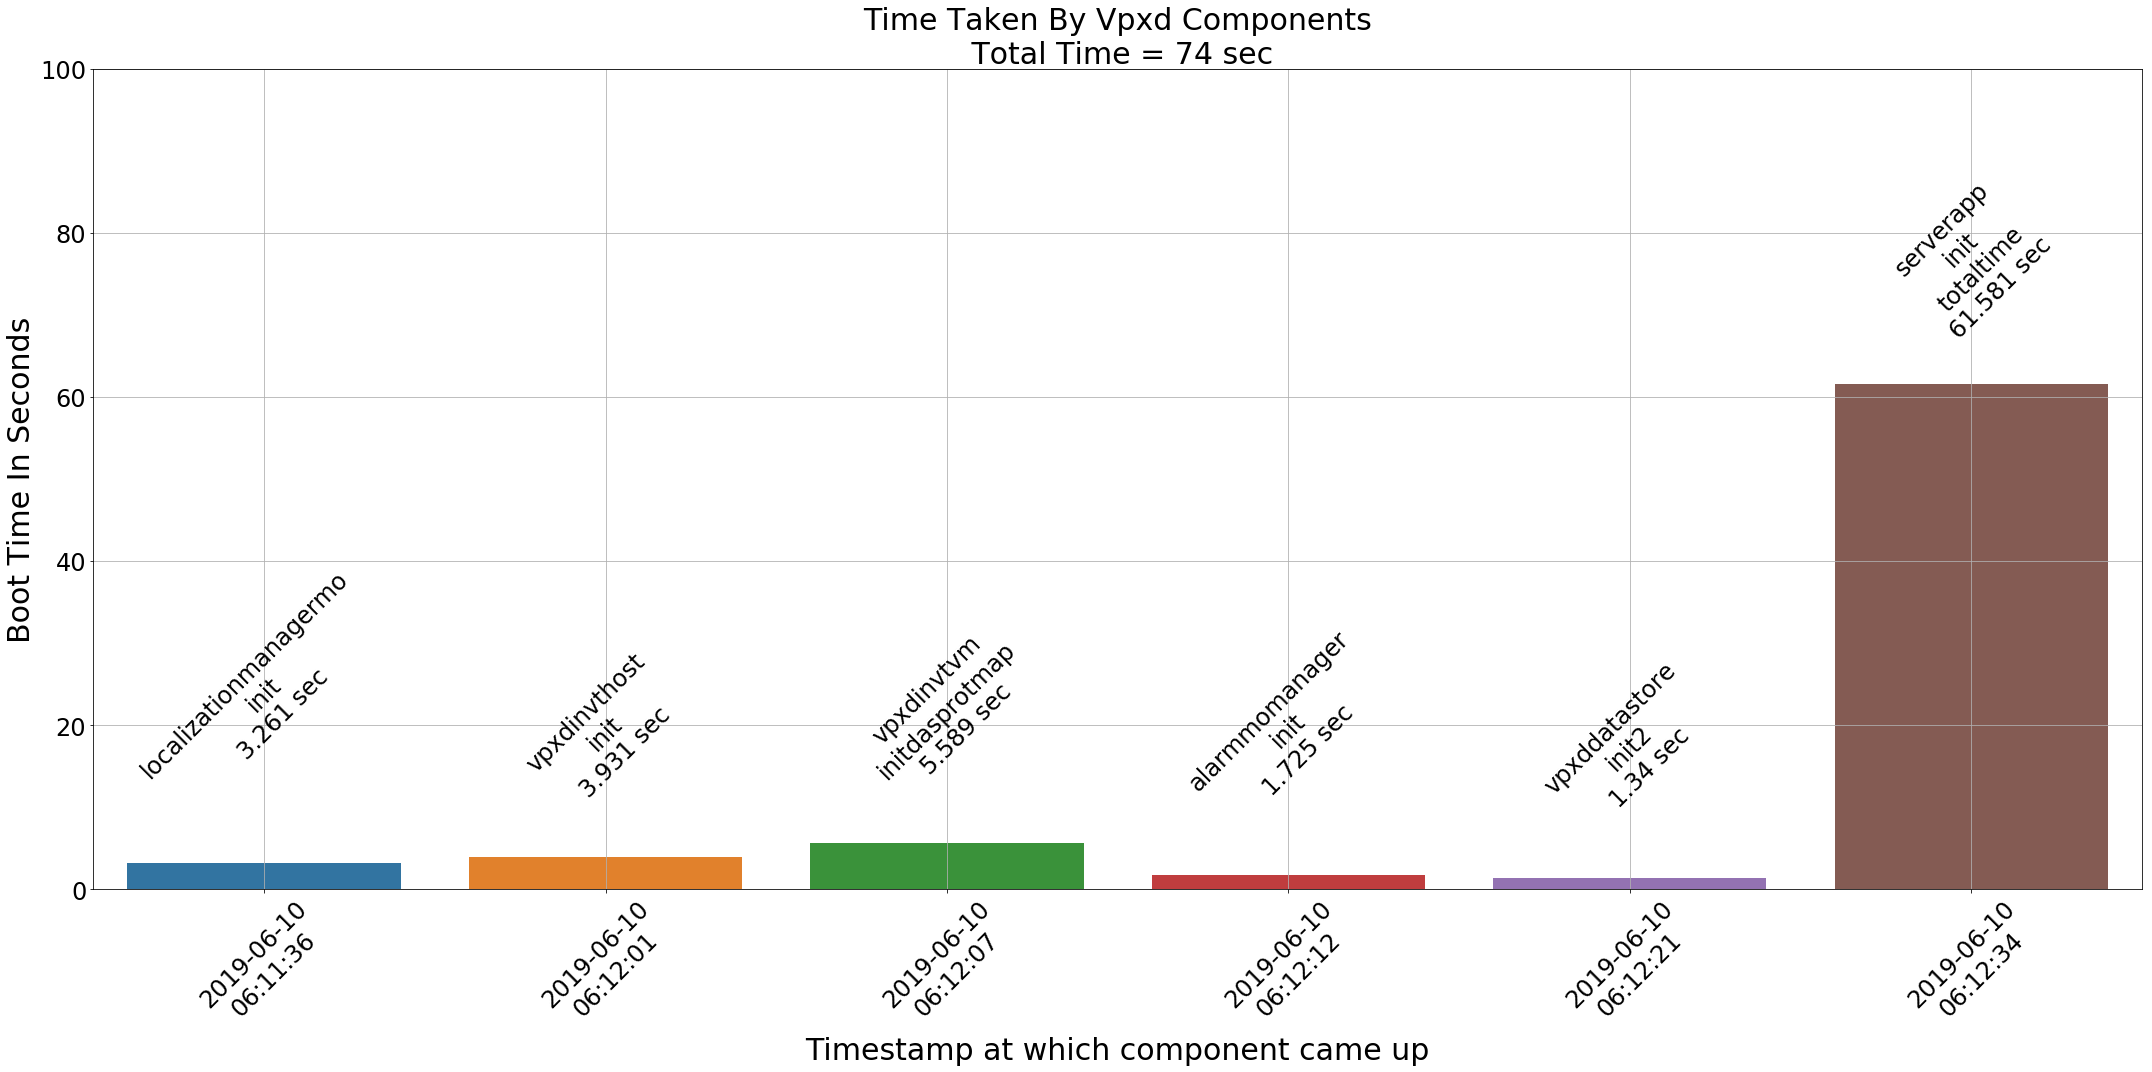

In [147]:
plt.figure(figsize=(30,15))
g = sns.barplot(data = df_vpxd, x =  'date', y = 'Max of stcomp_vpxd_comp_api_time (ST Charts)')
#g.text('1559783904','72.7128',"Bla",color='black',ha='center')
totalTime = (int)(df_vpxd['Max of stcomp_vpxd_comp_api_time (ST Charts)'].astype(int).sum())
plt.title("Time Taken By Vpxd Components\n Total Time = "+str(totalTime)+" sec",fontsize=30)

plt.grid(True)
plt.xticks(rotation=45,fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("Timestamp at which component came up",fontsize=30)
plt.ylabel("Boot Time In Seconds",fontsize=30)
plt.ylim(0,100)
g.set_xticklabels(df_vpxd["time"])

rects = g.patches

# Make some labels.
labels = df_vpxd["stcomp_vpxd_subcomp_name"].apply(lambda x: x.replace("::","\n").replace("(","").replace(")","").replace("[","").replace("]","").replace(" ","\n"))+"\n"+df_vpxd['Max of stcomp_vpxd_comp_api_time (ST Charts)'].astype(str)+" sec"

for rect, label in zip(rects, labels):
    height = rect.get_height()
    g.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom',fontsize=24,rotation=45)
    
plt.tight_layout()
    
plt.savefig('myplot2.png',dpi=300)




In [26]:
df_sortedByTimestamp = df_sortedByTimestamp.sort_values(by=['start','finish'])

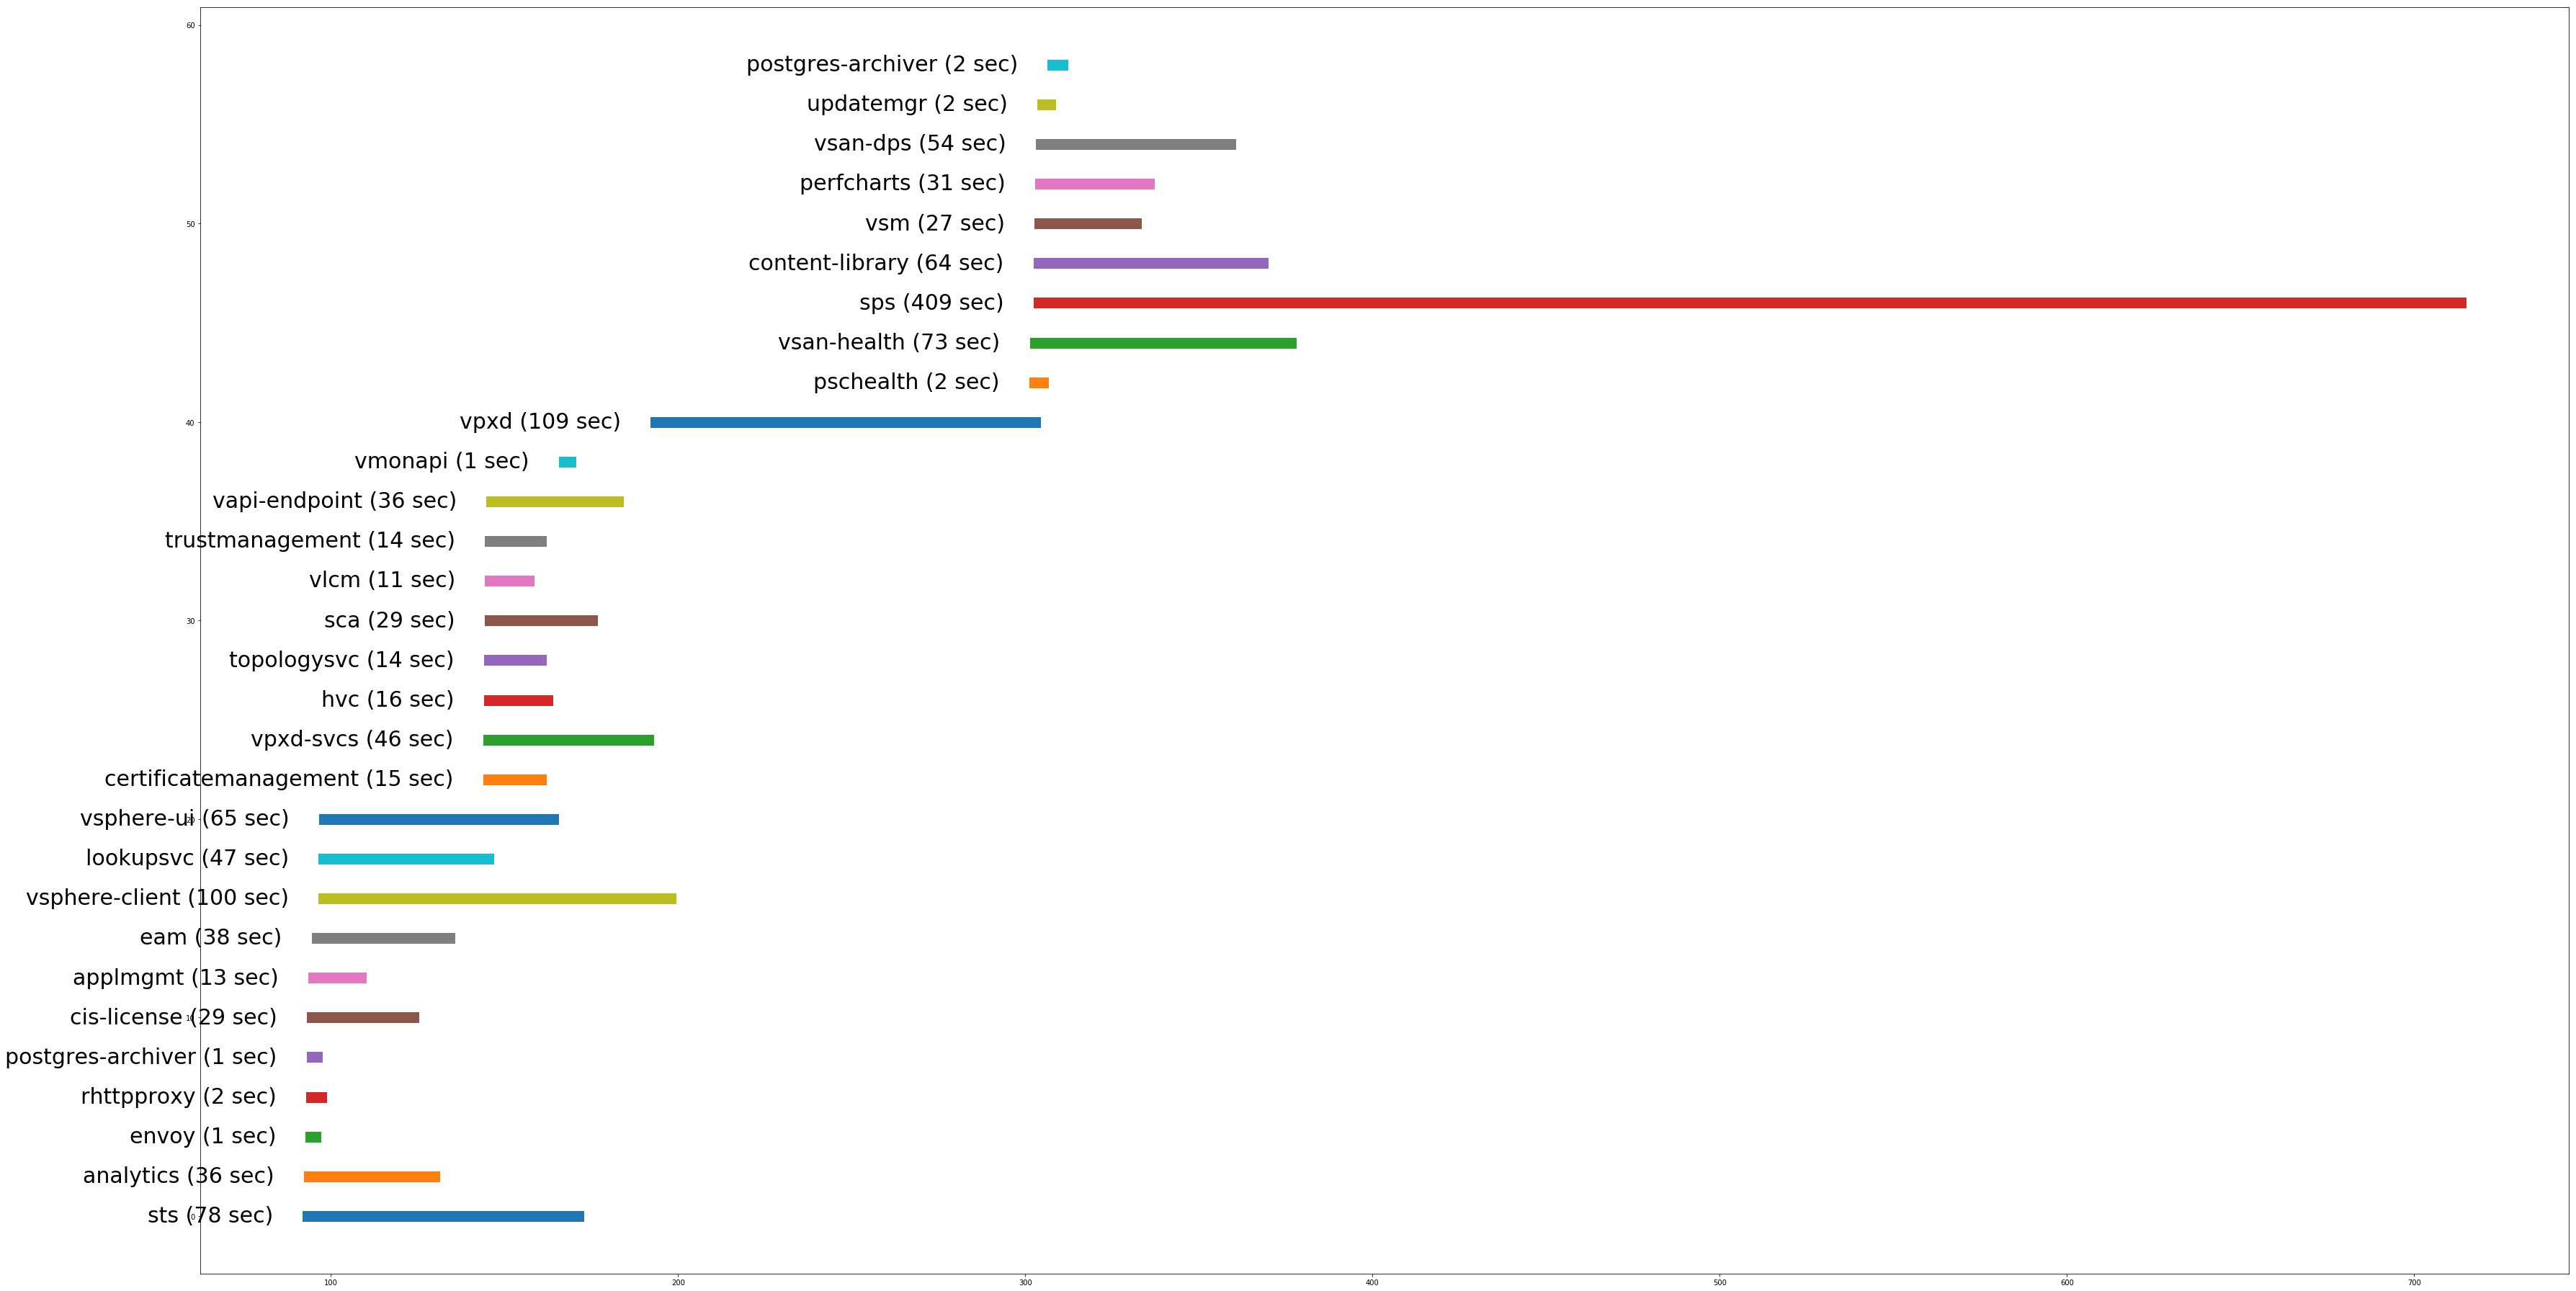

In [54]:
fig,ax = plt.subplots(figsize=(50,25))
#plt.ylim(-20,+20)

#plt.figure(figsize=(40,10))
cury = [1,2,3,4,5]
ci = 0
val = ["top","bottom"]
vi = 1
yi = 1
for i in range(df_sortedByTimestamp.shape[0]):
#for i in range(5):
    a = df_sortedByTimestamp.iloc[i]
    #if(a['finish']-a['start']>150):
    #    continue
    x = [a['start'],a['finish']]
    #print(x)
    #y = [cury[ci],cury[ci]]
    y = [2*i,2*i]
    plt.plot(x,y,ls='-',lw=15)#,ms=20,marker='o',markerfacecolor='black')
    #plt.plot([x[0],x[0]],[2*i-0.5,2*i+0.5],ls='--',lw=5)#,ms=20,marker='o',markerfacecolor='black')
    #plt.plot([x[1],x[1]],[2*i-0.5,2*i+0.5],ls='--',lw=5)
    yfactor = yi*3*(cury[(ci+4)%5])
    bx = [(x[0]+x[1])/2,(x[0]+x[1])/2]
    by = [cury[ci],yfactor]
    #plt.plot(bx,by,lw = 5)
    #markerline, stemlines, baseline = plt.stem(bx,by)
    #plt.setp(stemlines, 'linewidth', 5)
    myl = a["service"].replace('vmware-','') + " (" +str(a["boot_time_in_sec"]).split(".")[0] + " sec)"
    myl2 = a["last_triggered_at"].split(" ")[1][:11]
    myl3 = a["last_started_at"].split(" ")[1][:11]
    ax.text(x[0]-10,2*i,myl,ha='right',va='center',fontsize=30,rotation = 0)
    #ax.text(x[1]+5,2*i,myl2 + " to "+myl3,ha='left',va='center',fontsize=30,rotation = 0)
    vi=1-vi
    yi = -yi
    ci = (ci+1)%5

    
plt.tight_layout()
    
plt.savefig('myplot3.png',dpi=300)

plt.show()

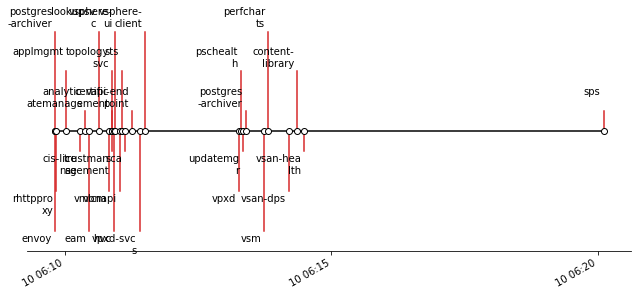

In [124]:
import matplotlib.dates as mdates
from datetime import datetime
df_sortedByTimestamp2 = df_sortedByTimestamp.iloc[6:]
dates = [datetime.strptime(d, "%Y-%m-%d %H:%M:%S.%f") for d in df_sortedByTimestamp2['last_started_at']]
names = df_sortedByTimestamp2['service'].apply(lambda x : x.replace('vmware-','')[:8]+'\n'+x.replace('vmware-','')[8:])
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
#ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-")

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right",rotation=0)

# format xaxis with 4 month intervals
#ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()
